<a href="https://colab.research.google.com/github/S-MAANASA/MILEAGE-PREDICTION/blob/main/ybiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MILEAGE PREDICTION - Regression Analysis

##Objective:
The objective of mileage prediction using regression analysis is to develop a statistical model that can accurately predict the fuel efficiency (mileage) of a vehicle based on various influencing factors. These factors can include attributes such as the vehicle's weight, engine size, horsepower, age, and other relevant features. The main goals of this analysis are:

1. **Understanding Relationships**: To identify and understand the relationships between the dependent variable (mileage) and independent variables (predictors). For example, how engine size or vehicle weight affects fuel efficiency.

2. **Prediction**: To accurately predict the mileage of a vehicle given its characteristics. This is useful for consumers, manufacturers, and policymakers to make informed decisions.

3. **Optimization**: To help in designing more fuel-efficient vehicles by understanding which factors most significantly impact mileage.

4. **Decision Making**: To aid consumers in choosing vehicles based on predicted fuel efficiency, leading to cost savings and environmental benefits.

5. **Model Evaluation**: To assess the performance of the predictive model using metrics such as R-squared, Mean Squared Error (MSE), and others, ensuring the model is reliable and valid.

By achieving these objectives, regression analysis can provide valuable insights and practical applications in the automotive industry and related fields.






##Data Source:
  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
  ### Data Set Information:

This dataset is a modified version of the StatLib library dataset, with 8 instances removed due to unknown "mpg" values. The original dataset is in "auto-mpg.data-original". It predicts city-cycle fuel consumption (mpg) based on 3 discrete and 5 continuous attributes.

### Attribute Information:

- **mpg**: Continuous (miles per gallon)
- **cylinders**: Discrete
- **displacement**: Continuous
- **horsepower**: Continuous
- **weight**: Continuous
- **acceleration**: Continuous
- **model year**: Discrete
- **origin**: Discrete
- **car name**: String (unique identifier)

This dataset aids in predicting vehicle fuel efficiency using various attributes.


##Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Data

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [4]:

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

##Describe Data

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


##Data Visualization

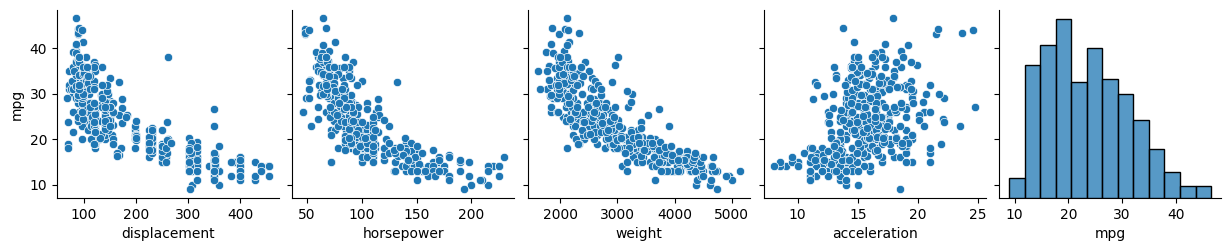

In [7]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration',	'mpg'], y_vars=['mpg']);

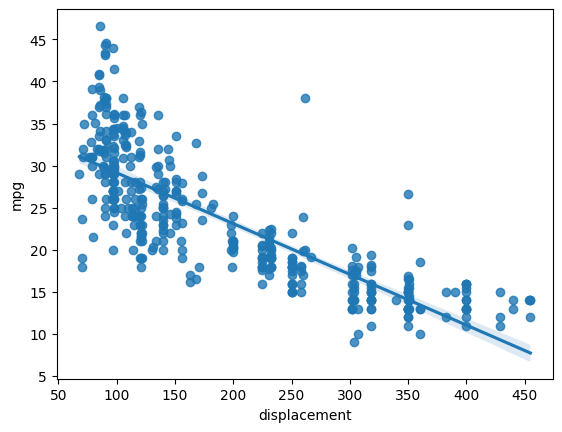

In [8]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

##Data Preprocessing


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


###remove missing values

In [10]:
df = df.dropna()

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


##Define Target Variable (y) and Feature Variables (X)

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [14]:

y = df['mpg']

In [15]:

y.shape

(392,)

In [16]:
X = df[['displacement', 'horsepower', 'weight', 'acceleration']]


In [17]:

X.shape

(392, 4)

In [18]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


###scaling data

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [20]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


##Train Test Split


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 4), (98, 4), (294,), (98,))

##Modeling

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [33]:
lr.intercept_

23.464404729340036

In [34]:

lr.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

##Model Evaluation:
Mileage = 23.5 - 0.82Displacemet - 2.00Horsepower - 4.13Weight - 0.165Acceleration + error

##Prediction


In [35]:
y_pred = lr.predict(X_test)
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

##Model Accuracy

In [36]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
mean_absolute_error(y_test, y_pred)

3.2128193572784176

In [37]:
mean_absolute_percentage_error(y_test, y_pred)

0.14486145216628085

In [38]:
r2_score(y_test, y_pred)

0.7174961864188241

##Explanation:
The A Mean Absolute Percentage Error (MAPE) of 0.1448 means that, on average the predictions made by this model deviate from the actual values by 14.48% which is a decent one.
  Accuracy =100%-MAPE
           =100%-14.48%
           
   Accuracy=85.52%
